# Exploratory Data Analysis of Haberman's Dataset

### Dataset Information:

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Attribute Information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (1 - The patient survived 5 years or longer, 2 - The patient died within 5 years)

### Objective:

The objective here is to classify whether or not a patient will survive for 5 years following a surgery for breast cancer based on the age of the patient, the year of operation and the number of positive axillary nodes detected.

### Importing and Cleaning of Data:
In this section, the data and the required libraries are imported and made ready for analysis.

In [1]:
# Importing the required library stack with their usual aliases

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings                       # In order to supress any warnings
warnings.filterwarnings('ignore')

In [2]:
# Saved the csv file locally.

hb = pd.read_csv('haberman.csv')

hb.head()

,Age,Operation_Year,Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# Usually, it is good practice to check for any null values in the data before proceeding with the analysis.
Empty_Check = hb[hb.isnull().any(axis = 1)]
Empty_Check.empty

True

In [4]:
# As we can see in the dataset, the survival statuses of the patients are represented numerically.
# Let us assign a better notation.
# A 'Yes' instead of a 1 signifying that the patient survived for over 5 years after the surgery.
# A 'No' instead of a 2 signifying that the patient survived for lesser than 5 years after the surgery.

hb['Survival_Status'] = hb['Survival_Status'].map({1:'Yes',2:'No'})
hb.head(10)

,Age,Operation_Year,Axillary_Nodes,Survival_Status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes
5,33,58,10,Yes
6,33,60,0,Yes
7,34,59,0,No
8,34,66,9,No
9,34,58,30,Yes


### High Level Statistics:
We answer some really basic questions about the data here like number of features, number of classes, number of datapoints etc.

In [5]:
# Shape of the data
print(hb.shape)

print('\n')

# Number of classes
print(hb['Survival_Status'].unique())

print('\n')

# Number of data points per class
print(hb['Survival_Status'].value_counts())

print('\n')

# General description of the data
print(hb.describe().round(2))

(306, 4)


['Yes' 'No']


Yes    225
No      81
Name: Survival_Status, dtype: int64


          Age  Operation_Year  Axillary_Nodes
count  306.00          306.00          306.00
mean    52.46           62.85            4.03
std     10.80            3.25            7.19
min     30.00           58.00            0.00
25%     44.00           60.00            0.00
50%     52.00           63.00            1.00
75%     60.75           65.75            4.00
max     83.00           69.00           52.00


### Univariate Analysis:
Here, we plot PDFs, CDFs, Box Plots on each feature and try to come to conclusions about the data and see which feature is useful in classification.

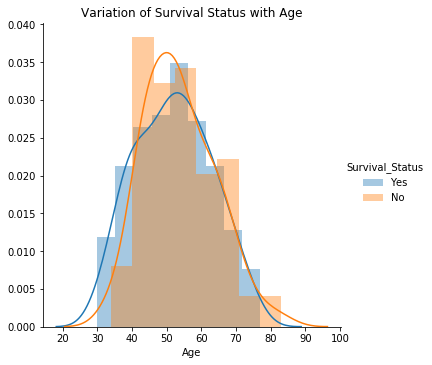

In [6]:
# 1.
# Plotting PDFs
# PDFs are basically a smoothened version of a histogram.
# They represent the probability that the variable takes a particular value.

sns.FacetGrid(hb, hue='Survival_Status',size = 5) \
    .map(sns.distplot,'Age') \
    .add_legend()
plt.title('Variation of Survival Status with Age')
plt.show()

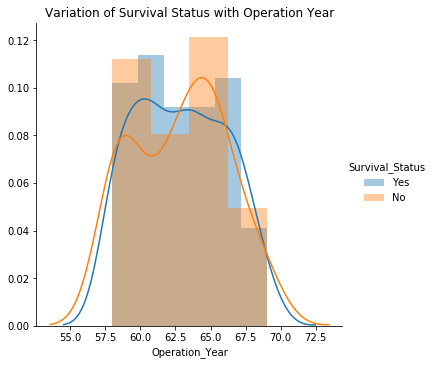

In [7]:
sns.FacetGrid(hb, hue='Survival_Status',size = 5) \
    .map(sns.distplot,'Operation_Year') \
    .add_legend()
plt.title('Variation of Survival Status with Operation Year')
plt.show()

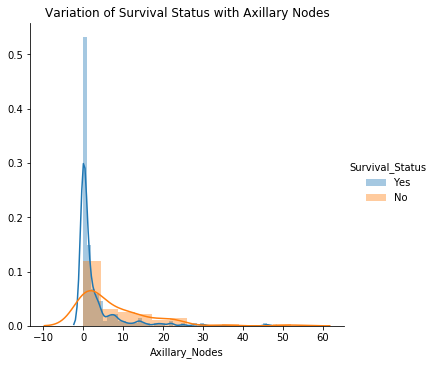

In [8]:
sns.FacetGrid(hb, hue='Survival_Status',size = 5) \
    .map(sns.distplot,'Axillary_Nodes') \
    .add_legend()
plt.title('Variation of Survival Status with Axillary Nodes')
plt.show()

In [9]:
# In order to understand the data in more detail and how each feature 
# is impacting the classification, we create a subset of the main dataframe.
# One subset has all the datapoints that lead to a 'Yes' and the other subset
# has all the datapoints that lead to a 'No'.

SS_Yes = hb[hb['Survival_Status'] == 'Yes']
SS_No = hb[hb['Survival_Status'] == 'No']

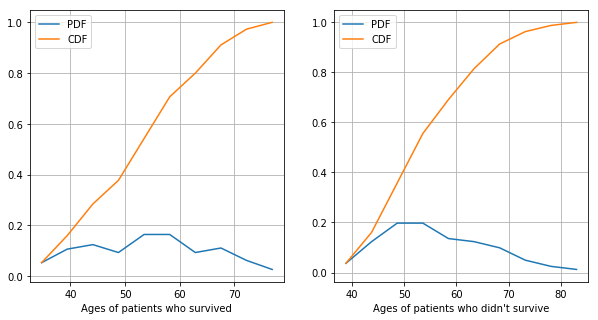

In [10]:
# 2.
# Plotting CDFs
# CDFs allow us to determine what percent of the datapoints in a dataset are below a particular value.
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
counts , bin_edges = np.histogram(SS_Yes['Age'], density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.grid()
plt.legend()
plt.xlabel('Ages of patients who survived')

plt.subplot(1,2,2)
counts , bin_edges = np.histogram(SS_No['Age'], density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.grid()
plt.legend()
plt.xlabel('Ages of patients who didn\'t survive')

plt.show()

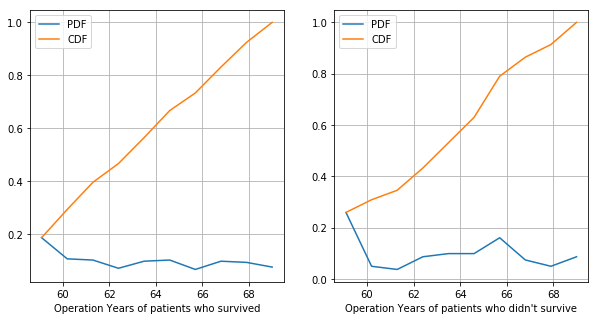

In [11]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
counts , bin_edges = np.histogram(SS_Yes['Operation_Year'], density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.grid()
plt.legend()
plt.xlabel('Operation Years of patients who survived')

plt.subplot(1,2,2)
counts , bin_edges = np.histogram(SS_No['Operation_Year'], density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.grid()
plt.legend()
plt.xlabel('Operation Years of patients who didn\'t survive')

plt.show()

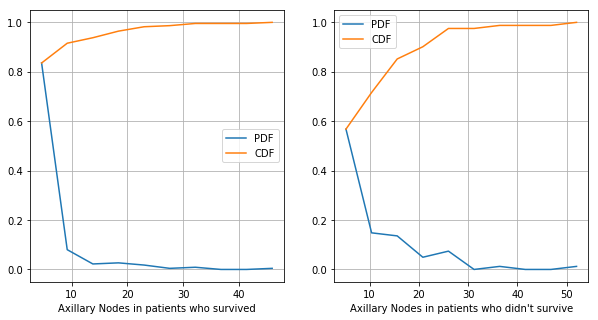

In [12]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
counts , bin_edges = np.histogram(SS_Yes['Axillary_Nodes'], density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.grid()
plt.legend()
plt.xlabel('Axillary Nodes in patients who survived')

plt.subplot(1,2,2)
counts , bin_edges = np.histogram(SS_No['Axillary_Nodes'], density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.grid()
plt.legend()
plt.xlabel('Axillary Nodes in patients who didn\'t survive')

plt.show()

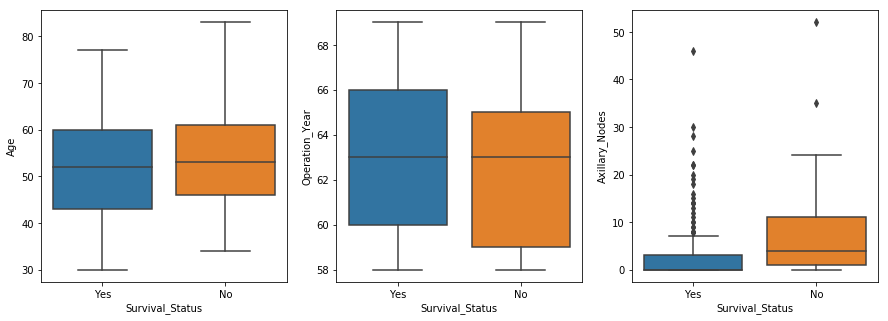

In [13]:
# 3.
# BOXPLOTS are a more visual and intuitive way of visualizing the dataset.
# There are 5 main lines in a box plot.
# The 3 lines in the middle represent the Inter-Quartile_Range, i.e. the 25th, 50th and 75th percentile respectively.
# The lines at the bottom and the top are the whiskers which are the [Q1 - 1.5(IQR)] and the [Q3 + 1.5(IQR)] respectively.
plt.figure(figsize = (15,5))

plt.subplot(131)
sns.boxplot(x='Survival_Status', y = 'Age', data = hb)
plt.subplot(132)
sns.boxplot(x='Survival_Status', y = 'Operation_Year', data = hb)
plt.subplot(133)
sns.boxplot(x='Survival_Status', y = 'Axillary_Nodes', data = hb)

plt.show()

### Bivariate Analysis
Here we plot a pairplot to see which combination of features does a better job at classification

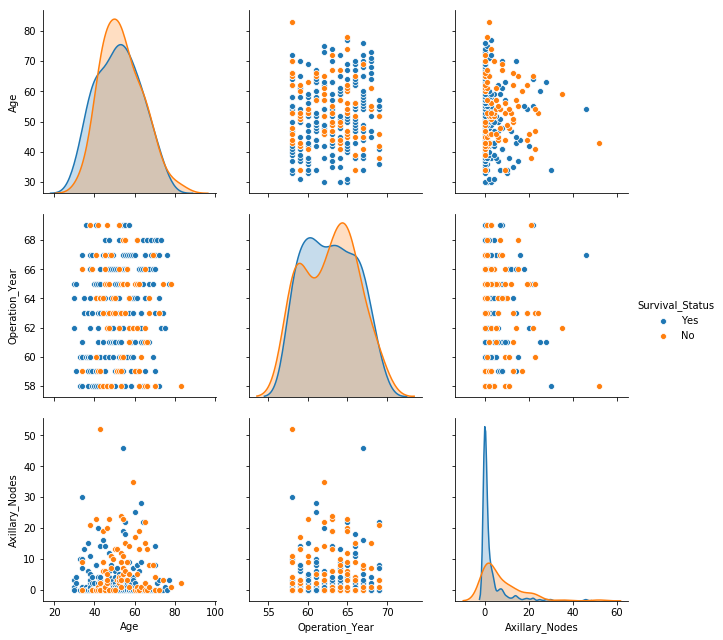

In [14]:
# Pairplot
sns.pairplot(hb,hue='Survival_Status',size = 3)
plt.show()

## Final Conclusions

*1. The number of rows (records of patients) are 306.*<br/>
*2. The number of classes are two, namely 'Yes' and 'No'.*<br/>
*3. There are 225 datapoints that result in a 'Yes'and 81 datapoints that result in a 'No'.*<br/>
*4. This is an imbalanced dataset.*<br/>
*5. The majority of patients that survived the treatment are in the ages between 50-60.*<br/>
*6. The majority of patients that didn't survive the treatment are around 50 years.*<br/>
*7. The number of Axillary Nodes found in patients are usually around (0-5) irrespective of their Survival Status.*<br/>
*8. About 90% of the patients that survived the surgery had less than 10 Axillary Nodes.*<br/>
*9. Roughly 70% of the patients that didn't survive the surgery had less than 10 Axillary Nodes.*<br/>
*10. In the case of Axillary Nodes, there seem to be quite a few number of outliers.*<br/>
*11. The ages of 50% of the patients who survived the treatment lie in between 43-60 roughly.*<br/>
*12. The ages of 50% of the patients who didn't survive the treatment are in between 46- 61 roughly.*<br/>
*13. Although there isn't much difference, the patients that couldn't survive the surgery are slightly older, on average, than those who did.*<br/>
*14. Similarly, the Operation Year of those patients who survived the surgery is sligjtly greater, on average, than those who didnt't.*<br/>
*15. The pairplot uses the three features to plot the graphs with combinations of features*<br/>
*16. Simply by looking, we can see that the plot between 'Operation_Year' and 'Axillary_Nodes' does the best job at classification*<br/>
*17. Although the classification is not perfect, it is better than the rest of the plots.*<br/>